# Data Science Nigeria 2021 AI Bootcamp Qualification Hackathon 

 >This project is aimed at buildng a robust intelligent model capable of recommending products and services to Users based on their activities on sapa.com

### Variable definitions

1. ID: Unique identifier for each User
2. Year_of_Birth: Year of birth
3. Education_Level: The highest level of education attained by the User
4. Marital_Status: Marital status
5. Disposable_Income: Yearly User’s household disposable income
6. No_of_Kids_in_home: total count of children in the user’s home
7. No_of_Teen_in_home: Number of teenagers in the User's household
8. Date_User: Date of User's enrollment with the company
9. Recency: Number of days since User's last purchase
10. Discounted_Purchases: Counts of purchases made by the user using coupons
11. WebPurchases: Counts of purchases made by the user through the company’s website
12. CatalogPurchases: Counts of purchases made by the user using a catalogue
13. StorePurchases: Counts of purchases made by the user directly in stores
14. Amount_on_Wines: Total amount user spent on wine and drinks within the last 3 years
15. Amount_on_Fruits: Total amount user spent on fruity food within the last 3 years
16. Amount_on_MeatProducts: Total amount user spent on meat products and livestock within the last 3 years
17. Amount_on_FishProducts: Total amount user spent on fish alone within the last 3 years
18. Amount_on_SweetProducts: Total amount user spent on sweets and chocolates within the last 3 years
19. Amount_on_GoldProds: Total amount user spent on golden products within the last 3 years
20. WebVisitsMonth: The number of times the user of visits to company’s website within the last 4 weeks
21. Cmp3Accepted: 1: Offer was accepted after the third campaign, 0 otherwise
22. Cmp4Accepted: 1: Offer was accepted after the fourth campaign, 0 otherwise
23. Cmp5Accepted: 1: Offer was accepted after the fifth campaign, 0 otherwise
24. Cmp1Accepted: 1: Offer was accepted after the first campaign, 0 otherwise
25. Cmp2Accepted: 1: Offer was accepted after the second campaign, 0 otherwise
26. Any_Complain: 1 if the user has a compliant history with the platform in the last 3 years, 0 otherwise
27. User_Response: 1: indicates the acceptance of offer and 0 otherwise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/content/Train.csv")
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [3]:
test = pd.read_csv("/content/Test.csv")
ID = test['ID']
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0


In [4]:
sub = pd.read_csv("/content/SampleSubmission.csv")
sub.head(2)

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN


## Exploratory Data Analysis

In [5]:
train.shape, test.shape

((1568, 27), (672, 26))

In [6]:
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [7]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Birth,1568.0,1970.073342,11.920781,1900.0,1960.0,1971.0,1979.00,1997.0
Disposable_Income,1552.0,62381.186598,32089.169563,2076.0,41612.4,60964.2,81493.20,799999.2
No_of_Kids_in_home,1568.0,0.460459,0.540361,0.0,0.0,0.0,1.00,2.0
No_of_Teen_in_home,1568.0,0.497449,0.544151,0.0,0.0,0.0,1.00,2.0
Recency,1568.0,55.408801,28.788037,7.0,31.0,56.0,80.00,106.0
Discounted_Purchases,1568.0,2.292730,1.937544,0.0,1.0,2.0,3.00,15.0
WebPurchases,1568.0,4.001276,2.773748,0.0,2.0,3.0,6.00,27.0
CatalogPurchases,1568.0,2.665816,3.043493,0.0,0.0,2.0,4.00,28.0
StorePurchases,1568.0,5.703444,3.260553,0.0,3.0,5.0,8.00,13.0
Amount_on_Wines,1568.0,303.190051,340.141396,5.0,27.0,167.0,499.50,1498.0


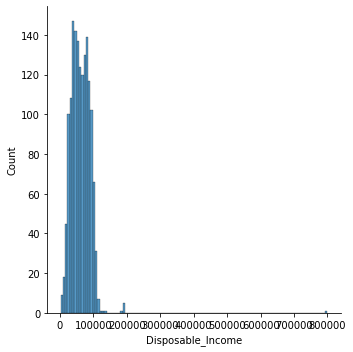

In [10]:
#filling the only missing value in train['Disposable_Income']; a displot will tell us how best to fill it

sns.displot(train['Disposable_Income'])

In [11]:
#Fill missing values with 25% quartile from describe above

train['Disposable_Income'] = train['Disposable_Income'].fillna(41612.4)
test['Disposable_Income'] = test['Disposable_Income'].fillna(41612.4)

In [12]:
train['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

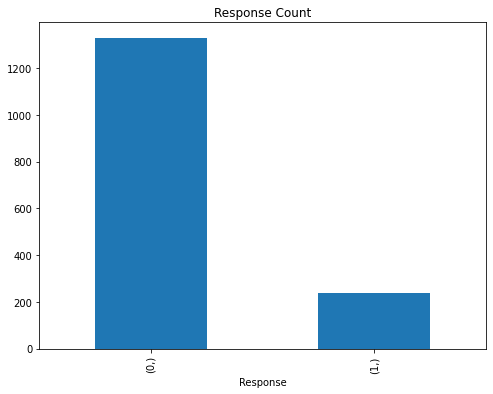

In [13]:
train[['Response']].value_counts().plot(kind='bar', figsize=(8, 6), title="Response Count")

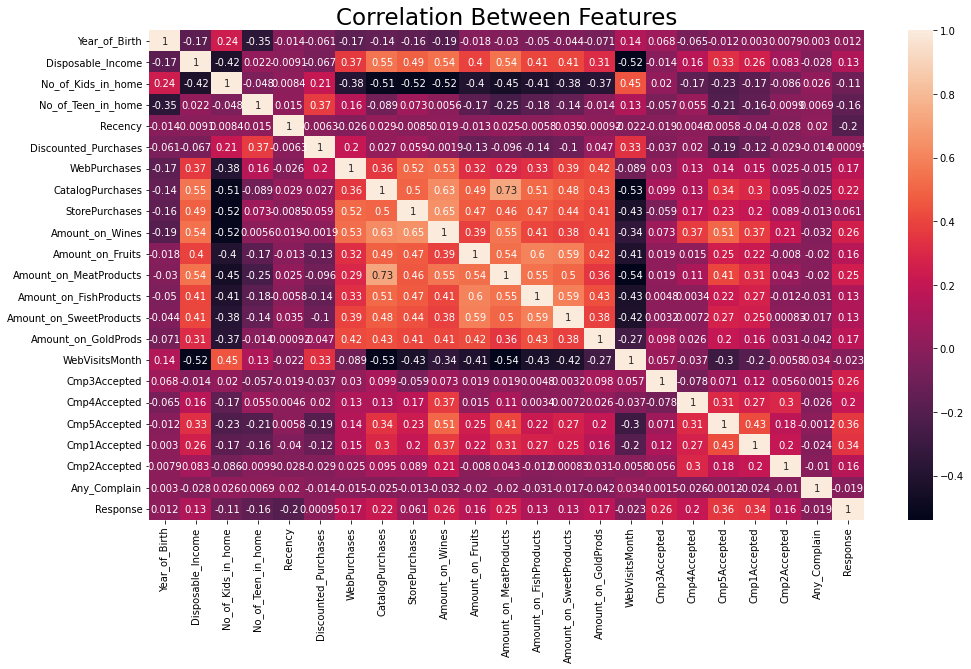

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation Between Features", fontsize=23)
plt.show()

## Feature Engineering and Encoding

In [15]:
#Year of birth

dataframe = [train, test]

for data in dataframe:
  data['Customer_current_Age'] = 2021 - data['Year_of_Birth']
  col = 'Year_of_Birth'
  conditions = [data[col] < 1950, (data[col] >= 1950) & (data[col] <= 1960), (data[col] > 1960) & (data[col] <=1970), (data[col] > 1970) & (data[col] <=1980), (data[col] > 1980) & (data[col] <=1990), data[col] > 1990]
  choices = [1, 2, 3, 4, 5, 6]
  data["Age_group"] = np.select(conditions, choices, default=np.nan).astype(int)

for data in dataframe:
  data = data.drop(['Year_of_Birth'],axis=1)

In [16]:
train['Age_group'].value_counts()

4    526
3    344
2    333
5    255
1     60
6     50
Name: Age_group, dtype: int64

In [17]:
print(train['Education_Level'].value_counts())
print("-----------------------------")

print(train['Marital_Status'].value_counts())

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64
-----------------------------
Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64


In [18]:
dataframe = [train, test]

for data in dataframe:
  data['Marital_Status'] = data['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'Single')   

In [19]:
#for Education level
def transform_edu(Education):
  if Education == 'PhD':
    return 4
  elif Education == 'Master':
    return 3
  elif Education == 'Graduation':
    return 2
  elif Education == '2n Cycle':
    return 1  
  else:
    return 0      

test['Education'] = test['Education_Level'].apply(transform_edu)
train['Education'] = train['Education_Level'].apply(transform_edu)

test['Education'].value_counts()

2    325
4    146
3    124
1     61
0     16
Name: Education, dtype: int64

In [20]:
#For Marital_Status
def transform_martial(status):
  if status == 'Married':
    return 1
  elif status == 'Together':
    return 2
  elif status == 'Single':
    return 3
  elif status == 'Divorced':
    return 4
  else:
    return 5        


#test['Marital_S'] = test['Marital_Status'].apply(transform_martial)
#train['Marital_S'] = train['Marital_Status'].apply(transform_martial)

#train['Marital_S'].value_counts()

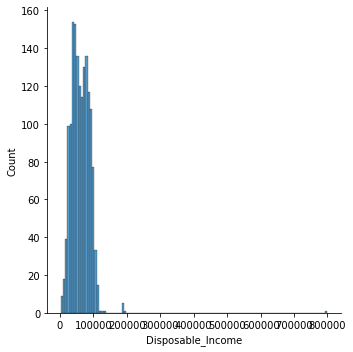

In [21]:
#For Disposable_Income

sns.displot(train['Disposable_Income'])

In [22]:
#For Disposable_Income

def convert_amount(amount):
  if amount <= 41612.4:
    return 1
  elif amount <= 60964.2:
    return 2
  elif amount <= 81493.20:
    return 3 
  elif amount <= 100000:
    return 4
  else:
    return 5  


  
train['disposable_amt_cat'] = train['Disposable_Income'].apply(convert_amount)
test['disposable_amt_cat'] = test['Disposable_Income'].apply(convert_amount)
  

train['disposable_amt_cat'].value_counts()

1    404
3    389
2    388
4    299
5     88
Name: disposable_amt_cat, dtype: int64

In [23]:
train['No_of_Kids_in_home'].value_counts()

0    880
1    654
2     34
Name: No_of_Kids_in_home, dtype: int64

## Extract date features:

In [24]:
date_col = ['Date_Customer']
for feat in date_col:
    test[feat] = pd.to_datetime(test[feat])
    train[feat] = pd.to_datetime(train[feat])

In [25]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.year
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
        df[feat +'_weekday'] = df[feat].dt.weekday
        df[feat +'_week'] = df[feat].dt.isocalendar().week
        df[feat + '_weekend'] = (df[feat].dt.weekday >=5).astype(int)
        df[feat +'_dayofweek'] = df[feat].dt.dayofweek

extract_date_info(train,date_col)
extract_date_info(test,date_col)

In [26]:
train['customer_last_patronize_year'] = 2021 - train['Date_Customer_year']
test['customer_last_patronize_year'] = 2021 - test['Date_Customer_year']

In [27]:
train['Date_Customer_year'].value_counts()

2013    832
2014    383
2012    353
Name: Date_Customer_year, dtype: int64

In [28]:
#For Date_Customer_year
def convert_date(Date_Customer_year):
  if Date_Customer_year <=2012:
    return 1
  elif Date_Customer_year <= 2013:
    return 2
  else:
    return 3

test['Customer_Date_category']  = test['Date_Customer_year'].apply(convert_date) 
train['Customer_Date_category']  = train['Date_Customer_year'].apply(convert_date)      

train['Customer_Date_category'].value_counts()

2    832
3    383
1    353
Name: Customer_Date_category, dtype: int64

In [29]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Customer_current_Age,Age_group,Education,disposable_amt_cat,Date_Customer_year,Date_Customer_day,Date_Customer_month,Date_Customer_quarter,Date_Customer_weekday,Date_Customer_week,Date_Customer_weekend,Date_Customer_dayofweek,customer_last_patronize_year,Customer_Date_category
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,66,2,2,3,2014,22,6,2,6,25,1,6,7,3
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,63,2,2,2,2013,8,1,1,1,2,0,1,8,2
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,59,3,2,5,2013,21,11,4,3,47,0,3,8,2
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,42,4,1,2,2013,13,9,3,4,37,0,4,8,2
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,62,2,2,4,2014,21,1,1,1,4,0,1,7,3


In [30]:
#For Date_hist
def convert_date(Date):
  if Date <=2012:
    return 1
  elif Date <= 2013:
    return 2
  else:
    return 3

#test['New_Date']  = test['Date_hist'].apply(convert_date) 
#train['New_Date']  = train['Date_hist'].apply(convert_date)      

#test['New_Date'].value_counts()

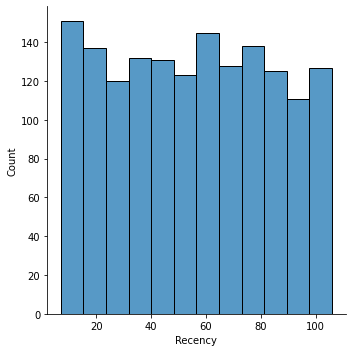

In [31]:
sns.displot(train['Recency'])

In [32]:
def convert_recency(recency):
  if recency <= 20:
    return 1
  elif recency <= 40:
    return 2
  elif recency <= 60:
    return 3
  elif recency <= 80:
    return 4
  else:
      return 5     

dataframe = [train, test]

for data in dataframe:
  data['new_Recency'] = data['Recency'].apply(convert_recency)
  data = data.drop(['Recency'],axis=1)

train['new_Recency'].value_counts()

5    384
4    327
2    306
3    304
1    247
Name: new_Recency, dtype: int64

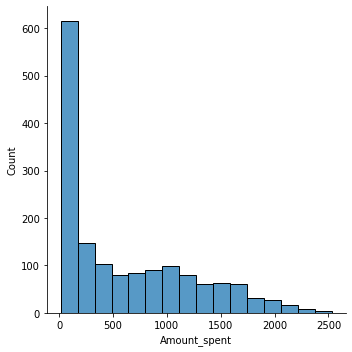

In [33]:
#Amount spent by user

dataframe = [train, test]

for data in dataframe:
  data['Amount_spent'] = data['Amount_on_FishProducts'] + data['Amount_on_Fruits'] + data['Amount_on_GoldProds'] + data['Amount_on_MeatProducts'] + data['Amount_on_SweetProducts'] + data['Amount_on_Wines']

#for data in dataframe:
  #data['Amt_since_join'] =  data['Amount_spent'] * data['Customer_Date_category']

sns.displot(train['Amount_spent'])

In [34]:
train[train.columns[0:]].corr()['Response'][:].sort_values(ascending=False)

Response                        1.000000
Cmp5Accepted                    0.357647
Cmp1Accepted                    0.344083
Amount_spent                    0.284348
Amount_on_Wines                 0.259173
Cmp3Accepted                    0.257106
Amount_on_MeatProducts          0.247182
CatalogPurchases                0.221534
Cmp4Accepted                    0.202437
disposable_amt_cat              0.187883
Amount_on_GoldProds             0.174229
WebPurchases                    0.165538
customer_last_patronize_year    0.159526
Cmp2Accepted                    0.157353
Amount_on_Fruits                0.155225
Amount_on_SweetProducts         0.133005
Disposable_Income               0.131291
Amount_on_FishProducts          0.129884
Education                       0.099124
StorePurchases                  0.061446
Date_Customer_quarter           0.034488
Date_Customer_week              0.028842
Age_group                       0.024233
Date_Customer_month             0.023729
Year_of_Birth   

In [35]:
train = train.drop(['ID',  'Year_of_Birth', 'Date_Customer', 'Recency'], axis=1)
test = test.drop(['ID',  'Year_of_Birth',  'Date_Customer', 'Recency'], axis=1)

In [36]:
train.head()

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Customer_current_Age,Age_group,Education,disposable_amt_cat,Date_Customer_year,Date_Customer_day,Date_Customer_month,Date_Customer_quarter,Date_Customer_weekday,Date_Customer_week,Date_Customer_weekend,Date_Customer_dayofweek,customer_last_patronize_year,Customer_Date_category,new_Recency,Amount_spent
0,Graduation,Divorced,77504.4,1,1,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,66,2,2,3,2014,22,6,2,6,25,1,6,7,3,3,116
1,Graduation,Together,56784.0,0,1,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,63,2,2,2,2013,8,1,1,1,2,0,1,8,2,1,422
2,Graduation,Single,103714.8,0,0,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,59,3,2,5,2013,21,11,4,3,47,0,3,8,2,1,1457
3,2n Cycle,Single,46311.6,1,0,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,42,4,1,2,2013,13,9,3,4,37,0,4,8,2,3,185
4,Graduation,Married,87486.0,0,0,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,62,2,2,4,2014,21,1,1,1,4,0,1,7,3,3,1523


In [37]:
test.head()

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Customer_current_Age,Age_group,Education,disposable_amt_cat,Date_Customer_year,Date_Customer_day,Date_Customer_month,Date_Customer_quarter,Date_Customer_weekday,Date_Customer_week,Date_Customer_weekend,Date_Customer_dayofweek,customer_last_patronize_year,Customer_Date_category,new_Recency,Amount_spent
0,Graduation,Single,48556.8,0,1,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0,67,2,2,2,2013,1,11,4,4,44,0,4,8,2,5,638
1,Graduation,Widow,57499.2,0,1,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0,60,3,2,2,2012,22,11,4,3,47,0,3,9,1,4,614
2,Basic,Married,17025.6,0,0,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0,48,4,0,1,2013,28,2,1,3,9,0,3,8,2,3,83
3,Graduation,Together,91983.6,0,0,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0,51,3,2,4,2013,16,8,3,4,33,0,4,8,2,5,2287
4,Graduation,Together,78235.2,0,2,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0,62,2,2,3,2013,25,7,3,3,30,0,3,8,2,3,1163


In [38]:
test.isnull().sum()

Education_Level                 0
Marital_Status                  0
Disposable_Income               0
No_of_Kids_in_home              0
No_of_Teen_in_home              0
Discounted_Purchases            0
WebPurchases                    0
CatalogPurchases                0
StorePurchases                  0
Amount_on_Wines                 0
Amount_on_Fruits                0
Amount_on_MeatProducts          0
Amount_on_FishProducts          0
Amount_on_SweetProducts         0
Amount_on_GoldProds             0
WebVisitsMonth                  0
Cmp3Accepted                    0
Cmp4Accepted                    0
Cmp5Accepted                    0
Cmp1Accepted                    0
Cmp2Accepted                    0
Any_Complain                    0
Customer_current_Age            0
Age_group                       0
Education                       0
disposable_amt_cat              0
Date_Customer_year              0
Date_Customer_day               0
Date_Customer_month             0
Date_Customer_

# One-hot encoding of remaining categorical variables

In [39]:
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (1568, 45)
Testing Features shape:  (672, 44)


In [40]:
train.shape, test.shape

((1568, 45), (672, 44))

In [41]:
train.head()

,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Customer_current_Age,Age_group,Education,disposable_amt_cat,Date_Customer_year,Date_Customer_day,Date_Customer_month,Date_Customer_quarter,Date_Customer_weekday,Date_Customer_week,Date_Customer_weekend,Date_Customer_dayofweek,customer_last_patronize_year,Customer_Date_category,new_Recency,Amount_spent,Education_Level_Basic,Education_Level_Graduation,Education_Level_Master,Education_Level_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,77504.4,1,1,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,66,2,2,3,2014,22,6,2,6,25,1,6,7,3,3,116,0,1,0,0,0,0,0,0
1,56784.0,0,1,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,63,2,2,2,2013,8,1,1,1,2,0,1,8,2,1,422,0,1,0,0,0,0,1,0
2,103714.8,0,0,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,59,3,2,5,2013,21,11,4,3,47,0,3,8,2,1,1457,0,1,0,0,0,1,0,0
3,46311.6,1,0,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,42,4,1,2,2013,13,9,3,4,37,0,4,8,2,3,185,0,0,0,0,0,1,0,0
4,87486.0,0,0,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,62,2,2,4,2014,21,1,1,1,4,0,1,7,3,3,1523,0,1,0,0,1,0,0,0


In [42]:
# prepare dataframe for modeling
X = train.drop(['Response'],axis = 1).copy()
y = train['Response'].copy()

test_data = test.copy()

In [43]:
# Additional Feature-engineering
def get_stats_per_row(data):
    data['mv_row'] = data.isna().sum(axis=1)
    #data['min_row'] = data.min(axis=1)
    data['std_row'] = data.std(axis=1)
    data['var_row'] = data.var(axis=1)
    return data

X = get_stats_per_row(X)
test_data = get_stats_per_row(test_data)

In [44]:
X['Date_Customer_week'] = X['Date_Customer_week'].astype("int")
test_data['Date_Customer_week'] = test_data['Date_Customer_week'].astype("int")

In [45]:
train = X.join(y)
features = list(train) 
target = 'Response'                 
features.remove('Response')                

In [46]:
!pip install bayesian-optimization --quiet

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
from bayes_opt import BayesianOptimization
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics
from sklearn import preprocessing
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

# Bayesian Optimization

In [48]:
# Cut train and validation
bayesian_tr_idx, bayesian_val_idx = train_test_split(train, test_size = 0.2, random_state = 42, stratify = train['Response'])
bayesian_tr_idx = bayesian_tr_idx.index
bayesian_val_idx = bayesian_val_idx.index

In [49]:
print(bayesian_tr_idx.shape, bayesian_val_idx.shape)

(1254,) (314,)


In [50]:
# Black Box LGBM 
def LGB_bayesian(
    #learning_rate,
    num_leaves, 
    bagging_fraction,
    feature_fraction,
    min_child_weight, 
    min_data_in_leaf,
    scale_pos_weight,
    max_depth,
    reg_alpha,
    reg_lambda
     ):
    
    # LightGBM expects next four parameters need to be integer. 
    num_leaves = int(num_leaves)
    min_data_in_leaf = int(min_data_in_leaf)
    scale_pos_weight = int(scale_pos_weight)
    max_depth = int(max_depth)

    assert type(num_leaves) == int
    assert type(min_data_in_leaf) == int
    assert type(scale_pos_weight) == int
    assert type(max_depth) == int
    

    param = {
              'num_leaves': num_leaves, 
              'min_data_in_leaf': min_data_in_leaf,
              'min_child_weight': min_child_weight,
              'scale_pos_weight': scale_pos_weight,
              'bagging_fraction' : bagging_fraction,
              'feature_fraction' : feature_fraction,
              #'learning_rate' : learning_rate,
              'max_depth': max_depth,
              'reg_alpha': reg_alpha,
              'reg_lambda': reg_lambda,
              'objective': 'binary',
              'save_binary': True,
              'zero_as_missing': True,
              'seed': 1337,
              'feature_fraction_seed': 1337,
              'bagging_seed': 1337,
              'drop_seed': 1337,
              'data_random_seed': 1337,
              'boosting_type': 'gbdt',  #dart
              'verbose': 1,
              #'is_unbalance': True,  # Note: Either of scale_pos_weight or is_unbalance must be used
              'boost_from_average': True,
              'metric':'auc'}    
    
    oof = np.zeros(len(train))
    trn_data= lgb.Dataset(train.iloc[bayesian_tr_idx][features].values, label=train.iloc[bayesian_tr_idx][target].values)
    val_data= lgb.Dataset(train.iloc[bayesian_val_idx][features].values, label=train.iloc[bayesian_val_idx][target].values)

    clf = lgb.train(param, trn_data,  num_boost_round=50, valid_sets = [trn_data, val_data], verbose_eval=0, early_stopping_rounds = 50)
    
    oof[bayesian_val_idx]  = clf.predict(train.iloc[bayesian_val_idx][features].values, num_iteration=clf.best_iteration)  
    
    score = roc_auc_score(train.iloc[bayesian_val_idx][target].values, oof[bayesian_val_idx])

    return score

In [51]:
bounds_LGB = {
    #'learning_rate': (0.001,0.005),
    'num_leaves'       : (20, 100),               
    'bagging_fraction' : (0.4, 0.8),
    'feature_fraction' : (0.2, 1),
    'min_child_weight': (0.0010, 0.0025),   
    'min_data_in_leaf': (50, 106),               
    'scale_pos_weight': (3, 10),
    'max_depth':(4,35),   # 24,30                       
    'reg_alpha': (1.2, 1.5), 
    'reg_lambda': (1.2, 1.5)
    
}

In [52]:
LGB_BO = BayesianOptimization(LGB_bayesian, bounds_LGB, random_state=42)

In [53]:
init_points = 10
n_iter = 10  

In [54]:
   print('-' * 130)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    LGB_BO.maximize(init_points=init_points, n_iter=n_iter, acq='ucb', xi=0.0, alpha=1e-6)

----------------------------------------------------------------------------------------------------------------------------------
|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_da... | num_le... | reg_alpha | reg_la... | scale_... |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.897    |  0.5498   |  0.9606   |  26.69    |  0.001898 |  58.74    |  32.48    |  1.217    |  1.46     |  7.208    |
|  2        |  0.8961   |  0.6832   |  0.2165   |  34.07    |  0.002249 |  61.89    |  34.55    |  1.255    |  1.291    |  6.673    |
|  3        |  0.9065   |  0.5728   |  0.433    |  22.97    |  0.001209 |  66.36    |  49.31    |  1.337    |  1.436    |  4.398    |
|  4        |  0.9079   |  0.6057   |  0.6739   |  5.44     |  0.001911 |  59.55    |  25.2     |  1.485    |  1.49     |  8.659    |
|  5        |  0.894    |  0.5218   |  0.2781   |  25.21    |  0.

In [55]:
LGB_BO.max['target']

0.9078947368421053

In [56]:
LGB_BO.max['params']

{'bagging_fraction': 0.6056937753654447,
 'feature_fraction': 0.6739316550896339,
 'max_depth': 5.439962794319929,
 'min_child_weight': 0.0019113172778521576,
 'min_data_in_leaf': 59.54935092648833,
 'num_leaves': 25.20412743882236,
 'reg_alpha': 1.4846656611759999,
 'reg_lambda': 1.4896896099223678,
 'scale_pos_weight': 8.658781436815229}

#Confusion Matrix

In [57]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#LGB + best hyperparameters

In [58]:
param_lgb = {
        'min_data_in_leaf': int(LGB_BO.max['params']['min_data_in_leaf']), 
        'num_leaves': int(LGB_BO.max['params']['num_leaves']), 
        #'learning_rate': LGB_BO.max['params']['learning_rate'],
        'min_child_weight': LGB_BO.max['params']['min_child_weight'],
        'bagging_fraction': LGB_BO.max['params']['bagging_fraction'], 
        'feature_fraction': LGB_BO.max['params']['feature_fraction'],
        'reg_lambda': LGB_BO.max['params']['reg_lambda'],
        'reg_alpha': LGB_BO.max['params']['reg_alpha'],
        'max_depth': int(LGB_BO.max['params']['max_depth']),
        'scale_pos_weight': int(LGB_BO.max['params']['scale_pos_weight']),
        'objective': 'binary',
        'save_binary': True,
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'boosting_type': 'gbdt',   # dart
        'verbose': 1,
        #'is_unbalance': True, Note: Either 'is_unbalance' or 'scale_pos_weight' must be used.
        'boost_from_average': True,
        'metric':'auc'
    }


fold 1
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.991697	valid_1's auc: 0.866228
[200]	training's auc: 0.998651	valid_1's auc: 0.872807
Early stopping, best iteration is:
[135]	training's auc: 0.995637	valid_1's auc: 0.87594

fold 2
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.992912	valid_1's auc: 0.905702
[200]	training's auc: 0.99903	valid_1's auc: 0.908521
[300]	training's auc: 0.99966	valid_1's auc: 0.9151
Early stopping, best iteration is:
[286]	training's auc: 0.999648	valid_1's auc: 0.91604

fold 3
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.992288	valid_1's auc: 0.91604
Early stopping, best iteration is:
[39]	training's auc: 0.96906	valid_1's auc: 0.921053

fold 4
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.992852	valid_1's auc: 0.911341
[200]	training's auc: 0.998553	valid_1's auc: 0.912281
Early stopping,

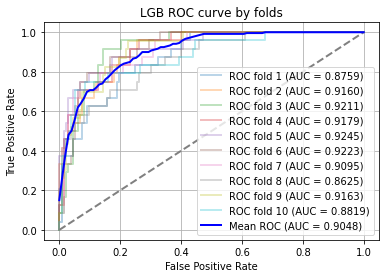

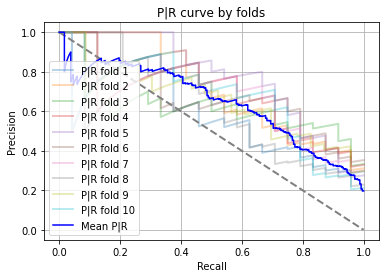

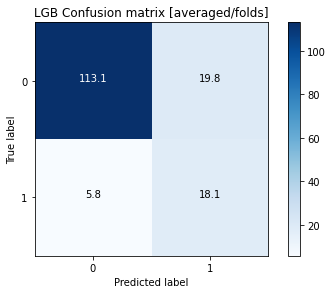

In [59]:
plt.rcParams["axes.grid"] = True

nfold = 10                  
skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=42)

oof = np.zeros(len(train))
mean_fpr = np.linspace(0,1,100)
cms= []
tprs = []
aucs = []
y_real = []
y_proba = []
recalls = []
roc_aucs = []
f1_scores = []
accuracies = []
precisions = []
predictions = np.zeros(len(test_data))
feature_importance_df = pd.DataFrame()

i = 1
for train_idx, valid_idx in skf.split(train, train.Response.values):
    print("\nfold {}".format(i))
    trn_data = lgb.Dataset(train.iloc[train_idx][features].values,
                                   label=train.iloc[train_idx][target].values
                                   )
    val_data = lgb.Dataset(train.iloc[valid_idx][features].values,
                                   label=train.iloc[valid_idx][target].values
                                   )   
    
    clf = lgb.train(param_lgb, trn_data, num_boost_round = 10000, valid_sets = [trn_data, val_data], verbose_eval = 100, early_stopping_rounds = 100)
    oof[valid_idx] = clf.predict(train.iloc[valid_idx][features].values) 
    
    predictions += clf.predict(test_data[features]) / nfold
    
    # Scores 
    roc_aucs.append(roc_auc_score(train.iloc[valid_idx][target].values, oof[valid_idx]))
    accuracies.append(accuracy_score(train.iloc[valid_idx][target].values, oof[valid_idx].round()))
    recalls.append(recall_score(train.iloc[valid_idx][target].values, oof[valid_idx].round()))
    precisions.append(precision_score(train.iloc[valid_idx][target].values ,oof[valid_idx].round()))
    f1_scores.append(f1_score(train.iloc[valid_idx][target].values, oof[valid_idx].round()))
    
    # Roc curve by folds
    f = plt.figure(1)
    fpr, tpr, t = roc_curve(train.iloc[valid_idx][target].values, oof[valid_idx])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i,roc_auc))
    
    # Precion recall by folds
    g = plt.figure(2)
    precision, recall, _ = precision_recall_curve(train.iloc[valid_idx][target].values, oof[valid_idx])
    y_real.append(train.iloc[valid_idx][target].values)
    y_proba.append(oof[valid_idx])
    plt.plot(recall, precision, lw=2, alpha=0.3, label='P|R fold %d' % (i))  
    
    i= i+1
    
    # Confusion matrix by folds
    cms.append(confusion_matrix(train.iloc[valid_idx][target].values, oof[valid_idx].round()))
    
    # Features imp
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = nfold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

# Metrics
print(
        '\nCV roc score        : {0:.4f}, std: {1:.4f}.'.format(np.mean(roc_aucs), np.std(roc_aucs)),
        '\nCV accuracy score   : {0:.4f}, std: {1:.4f}.'.format(np.mean(accuracies), np.std(accuracies)),
        '\nCV recall score     : {0:.4f}, std: {1:.4f}.'.format(np.mean(recalls), np.std(recalls)),
        '\nCV precision score  : {0:.4f}, std: {1:.4f}.'.format(np.mean(precisions), np.std(precisions)),
        '\nCV f1 score         : {0:.4f}, std: {1:.4f}.'.format(np.mean(f1_scores), np.std(f1_scores))
)

#ROC 
f = plt.figure(1)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'grey')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.4f)' % (np.mean(roc_aucs)),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGB ROC curve by folds')
plt.legend(loc="lower right")

# PR plt
g = plt.figure(2)
plt.plot([0,1],[1,0],linestyle = '--',lw = 2,color = 'grey')
y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
plt.plot(recall, precision, color='blue',
         label=r'Mean P|R')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('P|R curve by folds')
plt.legend(loc="lower left")

# Confusion maxtrix & metrics
plt.rcParams["axes.grid"] = False
cm = np.average(cms, axis=0) 
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title= 'LGB Confusion matrix [averaged/folds]')
plt.show()

#Feature Importance

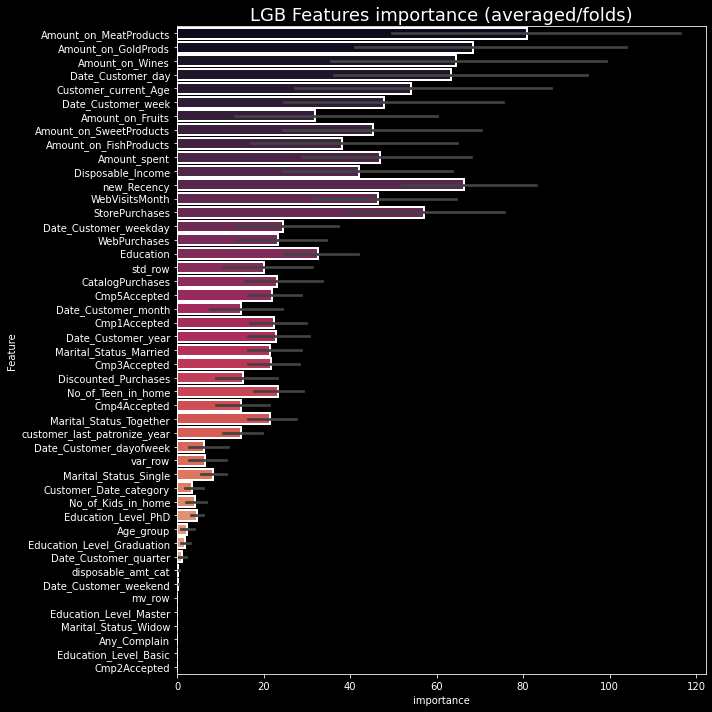

In [60]:
plt.style.use('dark_background')
cols = (feature_importance_df[["Feature", "importance"]]
    .groupby("Feature")
    .mean()
    .sort_values(by="importance", ascending=False)[:60].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False),
        edgecolor=('white'), linewidth=2, palette="rocket")
plt.title('LGB Features importance (averaged/folds)', fontsize=18)
plt.tight_layout()

#Submission:

In [61]:
sub['Response'] = predictions
sub['Response']=np.where(sub['Response'] > 0.43,1,0)
sub[["ID","Response"]].to_csv("LGBM.csv",index=False)                            # with threshold 0.4 ---> 0.72 on LB, 
                                                                                 # with threshold 0.41 ---> 0.72 on LB,
                                                                                 # with threshold 0.42 ---> 0.72 on LB, 
                                                                                 # with threshold 0.43 ---> 0.73469 on LB,  
sub[["ID","Response"]].head()                                                    # with threshold 0.5 ---> 0.7111 on LB,
                                                                                 # with threshold 0.45 ---> 0.7083  on LB,
                                                                                 # with threshold 0.44 ---> 0.7083  on LB,

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,1
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,0


In [62]:
sub['Response'].value_counts()

0    499
1    173
Name: Response, dtype: int64